In [1]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)

Mounted at /content/drive


# Part B

## Import Libraries

In [2]:
import numpy as np
import os
import cv2

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

## Q1 - Extract and load 'PINS

In [3]:
# import zipfile
# with zipfile.ZipFile("Data/PINS.zip", 'r') as zip_ref:
#     zip_ref.extractall("Data/PINS")
!unzip "Data/PINS.zip"

Streaming output truncated to the last 5000 lines.
  inflating: PINS/pins_kiernan shipka/kiernan shipka 10.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 100.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 101.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 102.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 103.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 104.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 105.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 106.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 107.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 108.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 109.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 11.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 110.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 111.jpg  
  inflating: PINS/pins_kiernan shipka/kiernan shipka 112.jpg  
  infl

In [5]:
os.listdir("PINS")[:5]

['pins_Aaron Paul',
 'pins_alexandra daddario',
 'pins_Alvaro Morte',
 'pins_alycia debnam carey face',
 'pins_Amanda Crew']

## Q2 - Function to create metadata of the image

In [6]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

## Q3 - Function to load metadata

In [7]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [11]:
# Call load_metadata to read the images and assign metadata to a variable

images_path = "PINS"
metadata = load_metadata(images_path)

In [12]:
count=0
for ele in metadata:
  if "taylor swift" in ele.image_path():
    count+=1
print(count)

99


In [13]:
# Write a function to read image using opencv and convert it from BGR to RGB

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]], dtype=uint8)
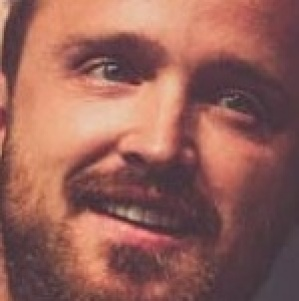

In [14]:
load_image(metadata[0].image_path())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
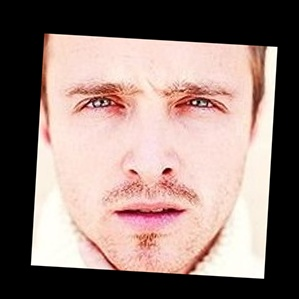

In [15]:
load_image(metadata[1].image_path())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
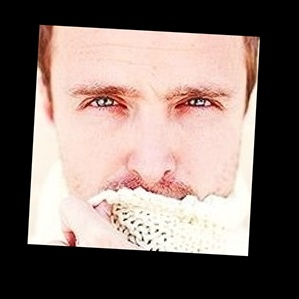

In [16]:
load_image(metadata[3].image_path())

## Q4 - Generate embedding vectors

In [17]:
def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [18]:
model = vgg_face()
model.load_weights('Data/vgg_face_weights.h5')

In [19]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [20]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
(2622,)


In [21]:
from tqdm import tqdm

embeddings = np.zeros((metadata.shape[0], 2622))
batch_size = 64
start_idx = 0
end_idx = len(metadata)
batch_indices = list(range(start_idx, end_idx))

# tqdm wraps the range to show a progress bar
for i in tqdm(range(0, len(batch_indices), batch_size), desc="Extracting embeddings"):
    batch_slice = batch_indices[i:i+batch_size]
    imgs = []

    for idx in batch_slice:
        img_path = metadata[idx].image_path()
        img = load_image(img_path)
        img = (img / 255.).astype(np.float32)
        img = cv2.resize(img, dsize=(224, 224))
        imgs.append(img)

    imgs_batch = np.array(imgs)
    preds = vgg_face_descriptor.predict(imgs_batch)

    for j, idx in enumerate(batch_slice):
        embeddings[idx] = preds[j]

Extracting embeddings:   0%|          | 0/169 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step


Extracting embeddings:   1%|          | 1/169 [00:20<58:39, 20.95s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:   1%|          | 2/169 [00:22<26:06,  9.38s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:   2%|▏         | 3/169 [00:23<15:08,  5.47s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:   2%|▏         | 4/169 [00:24<10:16,  3.74s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:   3%|▎         | 5/169 [00:25<07:36,  2.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:   4%|▎         | 6/169 [00:26<05:59,  2.21s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:   4%|▍         | 7/169 [00:27<04:58,  1.84s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:   5%|▍         | 8/169 [00:28<04:18,  1.60s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:   5%|▌         | 9/169 [00:29<03:40,  1.38s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:   6%|▌         | 10/169 [00:30<03:27,  1.30s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Extracting embeddings:   7%|▋         | 11/169 [00:31<03:19,  1.26s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting embeddings:   7%|▋         | 12/169 [00:32<02:57,  1.13s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:   8%|▊         | 13/169 [00:33<02:54,  1.12s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting embeddings:   8%|▊         | 14/169 [00:34<02:52,  1.11s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:   9%|▉         | 15/169 [00:35<02:49,  1.10s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:   9%|▉         | 16/169 [00:36<02:36,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting embeddings:  10%|█         | 17/169 [00:37<02:38,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting embeddings:  11%|█         | 18/169 [00:38<02:26,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting embeddings:  11%|█         | 19/169 [00:39<02:31,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting embeddings:  12%|█▏        | 20/169 [00:40<02:21,  1.05it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:  12%|█▏        | 21/169 [00:41<02:14,  1.10it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:  13%|█▎        | 22/169 [00:42<02:25,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  14%|█▎        | 23/169 [00:43<02:18,  1.05it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting embeddings:  14%|█▍        | 24/169 [00:44<02:27,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  15%|█▍        | 25/169 [00:45<02:29,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:  15%|█▌        | 26/169 [00:46<02:19,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting embeddings:  16%|█▌        | 27/169 [00:47<02:11,  1.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting embeddings:  17%|█▋        | 28/169 [00:47<02:06,  1.12it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:  17%|█▋        | 29/169 [00:49<02:13,  1.05it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  18%|█▊        | 30/169 [00:49<02:07,  1.09it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  18%|█▊        | 31/169 [00:50<02:02,  1.13it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  19%|█▉        | 32/169 [00:51<01:58,  1.15it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  20%|█▉        | 33/169 [00:52<02:07,  1.07it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  20%|██        | 34/169 [00:53<02:01,  1.11it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  21%|██        | 35/169 [00:54<01:57,  1.15it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  21%|██▏       | 36/169 [00:55<02:07,  1.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Extracting embeddings:  22%|██▏       | 37/169 [00:56<02:14,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  22%|██▏       | 38/169 [00:57<02:20,  1.07s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting embeddings:  23%|██▎       | 39/169 [00:58<02:19,  1.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting embeddings:  24%|██▎       | 40/169 [00:59<02:09,  1.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  24%|██▍       | 41/169 [01:00<02:01,  1.05it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  25%|██▍       | 42/169 [01:01<02:05,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  25%|██▌       | 43/169 [01:02<01:58,  1.07it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  26%|██▌       | 44/169 [01:03<02:02,  1.02it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  27%|██▋       | 45/169 [01:04<01:54,  1.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting embeddings:  27%|██▋       | 46/169 [01:05<02:00,  1.02it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:  28%|██▊       | 47/169 [01:06<01:53,  1.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  28%|██▊       | 48/169 [01:07<02:01,  1.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting embeddings:  29%|██▉       | 49/169 [01:08<02:13,  1.11s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Extracting embeddings:  30%|██▉       | 50/169 [01:09<02:03,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting embeddings:  30%|███       | 51/169 [01:10<02:07,  1.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  31%|███       | 52/169 [01:11<02:06,  1.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  31%|███▏      | 53/169 [01:12<01:56,  1.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting embeddings:  32%|███▏      | 54/169 [01:13<01:48,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting embeddings:  33%|███▎      | 55/169 [01:14<01:43,  1.10it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  33%|███▎      | 56/169 [01:15<01:39,  1.13it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  34%|███▎      | 57/169 [01:16<01:45,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  34%|███▍      | 58/169 [01:17<01:40,  1.10it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting embeddings:  35%|███▍      | 59/169 [01:17<01:37,  1.13it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  36%|███▌      | 60/169 [01:18<01:43,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  36%|███▌      | 61/169 [01:19<01:38,  1.10it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  37%|███▋      | 62/169 [01:20<01:43,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  37%|███▋      | 63/169 [01:22<01:48,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting embeddings:  38%|███▊      | 64/169 [01:23<01:51,  1.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Extracting embeddings:  38%|███▊      | 65/169 [01:24<01:51,  1.07s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  39%|███▉      | 66/169 [01:25<01:50,  1.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  40%|███▉      | 67/169 [01:26<01:49,  1.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  40%|████      | 68/169 [01:27<01:49,  1.09s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting embeddings:  41%|████      | 69/169 [01:28<01:48,  1.09s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  41%|████▏     | 70/169 [01:29<01:47,  1.09s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  42%|████▏     | 71/169 [01:30<01:47,  1.10s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  43%|████▎     | 72/169 [01:31<01:45,  1.09s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  43%|████▎     | 73/169 [01:32<01:37,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting embeddings:  44%|████▍     | 74/169 [01:33<01:40,  1.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Extracting embeddings:  44%|████▍     | 75/169 [01:35<01:40,  1.07s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  45%|████▍     | 76/169 [01:35<01:35,  1.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting embeddings:  46%|████▌     | 77/169 [01:37<01:35,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  46%|████▌     | 78/169 [01:37<01:28,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  47%|████▋     | 79/169 [01:38<01:30,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  47%|████▋     | 80/169 [01:39<01:24,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting embeddings:  48%|████▊     | 81/169 [01:40<01:20,  1.10it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  49%|████▊     | 82/169 [01:41<01:16,  1.13it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  49%|████▉     | 83/169 [01:42<01:14,  1.15it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  50%|████▉     | 84/169 [01:43<01:12,  1.18it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  50%|█████     | 85/169 [01:44<01:17,  1.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  51%|█████     | 86/169 [01:45<01:20,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  51%|█████▏    | 87/169 [01:46<01:22,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting embeddings:  52%|█████▏    | 88/169 [01:47<01:24,  1.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Extracting embeddings:  53%|█████▎    | 89/169 [01:48<01:20,  1.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Extracting embeddings:  53%|█████▎    | 90/169 [01:49<01:17,  1.02it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  54%|█████▍    | 91/169 [01:50<01:26,  1.11s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  54%|█████▍    | 92/169 [01:51<01:20,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  55%|█████▌    | 93/169 [01:52<01:20,  1.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  56%|█████▌    | 94/169 [01:53<01:14,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  56%|█████▌    | 95/169 [01:54<01:09,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  57%|█████▋    | 96/169 [01:55<01:12,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  57%|█████▋    | 97/169 [01:56<01:13,  1.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  58%|█████▊    | 98/169 [01:57<01:08,  1.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  59%|█████▊    | 99/169 [01:58<01:09,  1.00it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Extracting embeddings:  59%|█████▉    | 100/169 [01:59<01:11,  1.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Extracting embeddings:  60%|█████▉    | 101/169 [02:00<01:06,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Extracting embeddings:  60%|██████    | 102/169 [02:01<01:04,  1.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  61%|██████    | 103/169 [02:02<01:02,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  62%|██████▏   | 104/169 [02:03<01:04,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting embeddings:  62%|██████▏   | 105/169 [02:04<01:05,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Extracting embeddings:  63%|██████▎   | 106/169 [02:05<01:05,  1.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  63%|██████▎   | 107/169 [02:06<01:05,  1.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  64%|██████▍   | 108/169 [02:07<01:00,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  64%|██████▍   | 109/169 [02:08<00:56,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  65%|██████▌   | 110/169 [02:09<00:58,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  66%|██████▌   | 111/169 [02:10<00:59,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  66%|██████▋   | 112/169 [02:11<00:55,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Extracting embeddings:  67%|██████▋   | 113/169 [02:12<00:56,  1.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  67%|██████▋   | 114/169 [02:13<00:53,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Extracting embeddings:  68%|██████▊   | 115/169 [02:14<00:54,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  69%|██████▊   | 116/169 [02:15<00:55,  1.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Extracting embeddings:  69%|██████▉   | 117/169 [02:16<00:55,  1.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Extracting embeddings:  70%|██████▉   | 118/169 [02:17<00:51,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting embeddings:  70%|███████   | 119/169 [02:18<00:48,  1.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  71%|███████   | 120/169 [02:19<00:45,  1.09it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  72%|███████▏  | 121/169 [02:20<00:42,  1.12it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  72%|███████▏  | 122/169 [02:20<00:41,  1.14it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  73%|███████▎  | 123/169 [02:21<00:39,  1.15it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  73%|███████▎  | 124/169 [02:22<00:38,  1.16it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  74%|███████▍  | 125/169 [02:23<00:40,  1.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  75%|███████▍  | 126/169 [02:24<00:38,  1.11it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Extracting embeddings:  75%|███████▌  | 127/169 [02:25<00:40,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Extracting embeddings:  76%|███████▌  | 128/169 [02:26<00:42,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Extracting embeddings:  76%|███████▋  | 129/169 [02:28<00:43,  1.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting embeddings:  77%|███████▋  | 130/169 [02:29<00:42,  1.08s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Extracting embeddings:  78%|███████▊  | 131/169 [02:29<00:38,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting embeddings:  78%|███████▊  | 132/169 [02:31<00:38,  1.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting embeddings:  79%|███████▊  | 133/169 [02:32<00:37,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting embeddings:  79%|███████▉  | 134/169 [02:33<00:37,  1.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  80%|███████▉  | 135/169 [02:34<00:33,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting embeddings:  80%|████████  | 136/169 [02:35<00:33,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting embeddings:  81%|████████  | 137/169 [02:36<00:33,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  82%|████████▏ | 138/169 [02:37<00:30,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Extracting embeddings:  82%|████████▏ | 139/169 [02:37<00:28,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Extracting embeddings:  83%|████████▎ | 140/169 [02:39<00:28,  1.00it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Extracting embeddings:  83%|████████▎ | 141/169 [02:40<00:29,  1.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  84%|████████▍ | 142/169 [02:41<00:28,  1.07s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  85%|████████▍ | 143/169 [02:42<00:25,  1.00it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  85%|████████▌ | 144/169 [02:43<00:25,  1.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Extracting embeddings:  86%|████████▌ | 145/169 [02:44<00:25,  1.05s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting embeddings:  86%|████████▋ | 146/169 [02:45<00:22,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  87%|████████▋ | 147/169 [02:46<00:22,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting embeddings:  88%|████████▊ | 148/169 [02:47<00:21,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  88%|████████▊ | 149/169 [02:48<00:19,  1.02it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  89%|████████▉ | 150/169 [02:49<00:17,  1.07it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Extracting embeddings:  89%|████████▉ | 151/169 [02:50<00:17,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting embeddings:  90%|████████▉ | 152/169 [02:51<00:16,  1.04it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Extracting embeddings:  91%|█████████ | 153/169 [02:51<00:15,  1.06it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting embeddings:  91%|█████████ | 154/169 [02:53<00:15,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting embeddings:  92%|█████████▏| 155/169 [02:54<00:14,  1.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  92%|█████████▏| 156/169 [02:55<00:13,  1.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting embeddings:  93%|█████████▎| 157/169 [02:56<00:11,  1.01it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  93%|█████████▎| 158/169 [02:57<00:11,  1.02s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  94%|█████████▍| 159/169 [02:58<00:09,  1.03it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  95%|█████████▍| 160/169 [02:58<00:08,  1.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  95%|█████████▌| 161/169 [02:59<00:07,  1.11it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting embeddings:  96%|█████████▌| 162/169 [03:00<00:06,  1.13it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting embeddings:  96%|█████████▋| 163/169 [03:01<00:05,  1.15it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting embeddings:  97%|█████████▋| 164/169 [03:02<00:04,  1.16it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting embeddings:  98%|█████████▊| 165/169 [03:03<00:03,  1.08it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting embeddings:  98%|█████████▊| 166/169 [03:04<00:03,  1.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Extracting embeddings:  99%|█████████▉| 167/169 [03:05<00:01,  1.02it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting embeddings:  99%|█████████▉| 168/169 [03:06<00:00,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting embeddings: 100%|██████████| 169/169 [03:14<00:00,  1.15s/it]


In [23]:
embeddings[0]

array([ 0.03170304, -0.01505128, -0.012434  , ...,  0.00043139,
        0.0021908 , -0.00908096])

In [24]:
embeddings[180]

array([ 0.01340985,  0.00358713,  0.00880117, ..., -0.01944223,
        0.01096224,  0.03656414])

In [25]:
np.sum(np.square(embeddings[2] - embeddings[180]))

np.float64(0.6863399591201675)

In [26]:
len(metadata)

10770

## Q5 - Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [27]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([embeddings[2]], [embeddings[180]])

array([[0.47970377]])

In [29]:
#  Plot images and get distance between the pairs given below
# - 2, 3 and 2, 180
# - 30, 31 and 30, 100
# - 70, 72 and 70, 115

import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

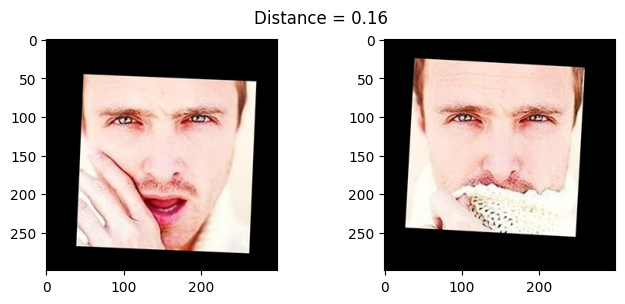

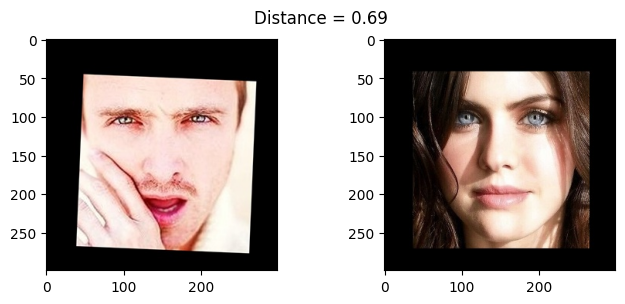

In [30]:
show_pair(2, 3)
show_pair(2, 180)

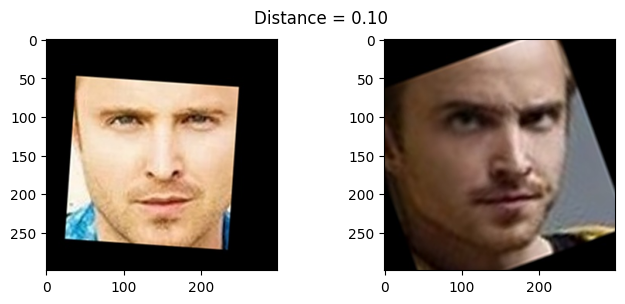

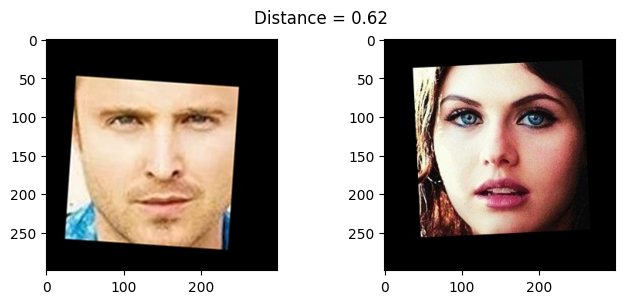

In [31]:
show_pair(30, 31)
show_pair(30, 100)

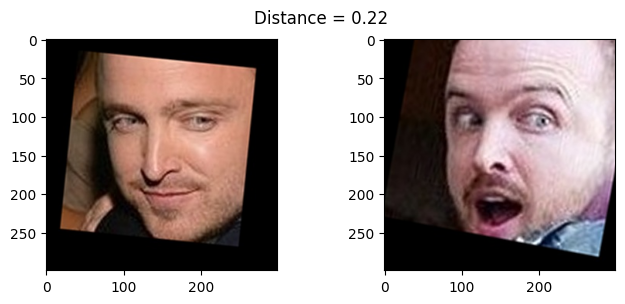

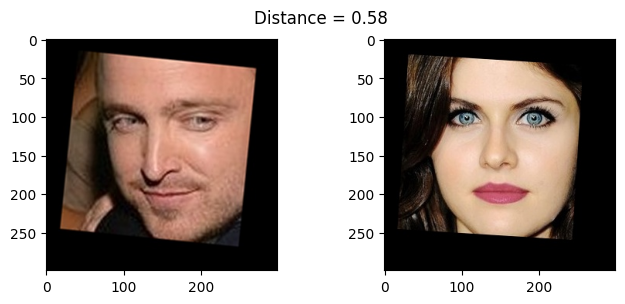

In [32]:
show_pair(70, 72)
show_pair(70, 115)

## Q6 - Creating Training and Testing Data

In [33]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

## Encoding The Labels

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Apply PCA on the embedding vectors

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Build and train a SVM classifier on top of it.

In [37]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_pca,y_train_enc)

SVC(kernel='linear')

In [38]:
acc = svm.score(X_test_pca, y_test_enc)
print(f"PCA + SVM Test Accuracy: {acc:.2%}")

PCA + SVM Test Accuracy: 95.32%


The classifier is showing very high accuracy. PCA helps in dimensionality reduction which improves the performance of the model

## Use the trained SVM model to predict the labels of the test images.

### Import and display test images

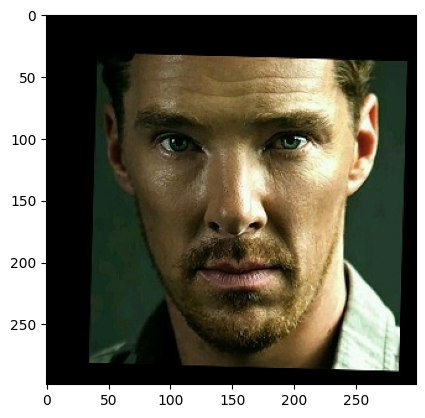

In [39]:
test_image1 = plt.imread("Data/Benedict Cumberbatch9.jpg")
plt.imshow(test_image1)

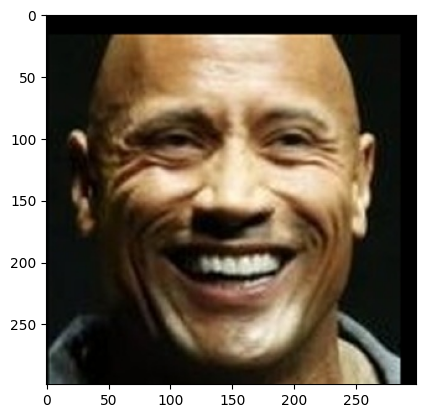

In [40]:
test_image2 = plt.imread("Data/Dwayne Johnson4.jpg")
plt.imshow(test_image2)

## Use the trained SVM model to predict the labels of the test images.

In [41]:
def prepare_image_to_predict(image_path):
    img = load_image(image_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize=(224, 224))
    return img

def create_embedding_for_image_with_scaling(img):
    embedding = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embedding = scaler.transform([embedding])
    embedding = pca.transform(embedding)
    return embedding

def prediction(image_path):
    img = prepare_image_to_predict(image_path)
    embedding_vector = create_embedding_for_image_with_scaling(img)
    prediction = svm.predict(embedding_vector)
    return prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Text(0.5, 1.0, 'pins_Benedict Cumberbatch')

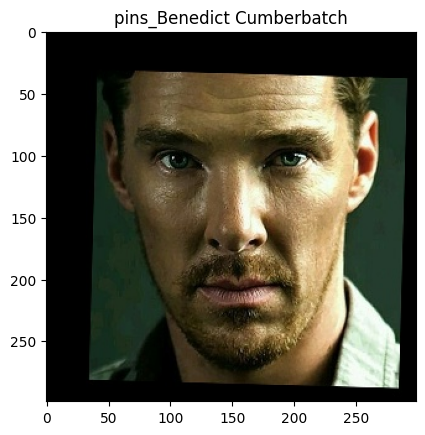

In [42]:
test_image1_prediction = le.inverse_transform(prediction("Data/Benedict Cumberbatch9.jpg"))[0]
plt.imshow(test_image1)
plt.title(test_image1_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Text(0.5, 1.0, 'pins_Dwayne Johnson')

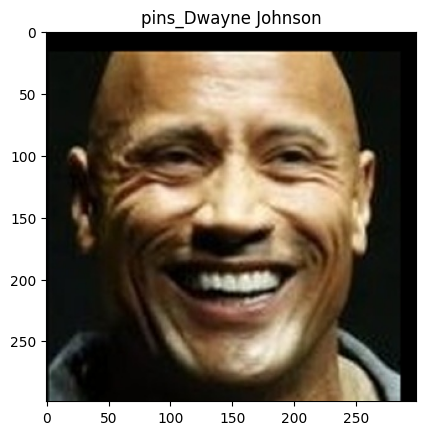

In [43]:
test_image2_prediction = le.inverse_transform(prediction("Data/Dwayne Johnson4.jpg"))[0]
plt.imshow(test_image2)
plt.title(test_image2_prediction)

# **Business Recommendation**

- Along with faces, if information like which other movies, the actor appears is provided. We can flag the necessary actor/image with all the movies he/she is present in.
- Using the SVM Classifier, we are correctly able to distinguish many actors.
-The Training data could have screenshots with multiple actors in them to create a strong dataset.
-The predictions done on the PINS dataset could later also be used to train a custom YOLO model to correctly depict the actor directly from screenshots.